# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

Comment: This project is meant to study the data at Crankshaft List in order to determine the factors that influence vehicle prices. 

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load data

In [2]:
# Load the data file into a DataFrame
data = pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal


In [3]:
# print the general/summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [5]:
# print a sample of data
data.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
6887,15250,2005.0,ford f350,excellent,8.0,diesel,147200.0,automatic,truck,red,1.0,2019-01-20,85


In [6]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [7]:
data.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


Comment: Potential issues that could be fixed or cleaned:
- The 'model_year' column values are in a string format. Could be converted to an integer.
- The 'cylinders' column values are in a float format. Could be converted to int or string. 
- The 'odometer' column values are in a float format. Could be coverted to int.
- There are missing values in the columns: model_year, cylinders, odometer, paint_color, and is_4wd.
- 'is_4wd' and 'paint_color' contains the most missing values

In [8]:
data.duplicated().sum()

0

### Conclusions and further steps

Comment: It looks like some of the values in the price column look incorrect. There are vehicles priced at $1. Some of the data types should be changed. For instance, the 'model_year' column can be changed to remove the decimals. There also seem to be irregularities. For intance there is at least one vehicle that has been on the website for 271. And a vehicle where the 'model_year' is 1908. We can further analyse the data to see if this information is accurate. 

## Treat missing values (if any)

In [9]:
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [10]:
data['model_year'].isna().sum()

3619

In [11]:
data['cylinders'].isna().sum()

5260

In [12]:
mean_Dict = data.groupby(['type'])['odometer'].mean()
mean_dict = mean_Dict.to_dict()

In [13]:
data['is_4wd'].isna().sum()


25953

In [14]:
print(mean_Dict)

type
SUV            118312.160118
bus            114198.173913
convertible     84189.535620
coupe           78367.868059
hatchback      111066.444934
mini-van       127968.242211
offroad        121516.791444
other          107939.748879
pickup         120877.717388
sedan          107853.607920
truck          123228.543644
van            124701.476768
wagon          123748.181331
Name: odometer, dtype: float64


In [15]:
missing_mask = data['odometer'].isna() # finding all the nans in ['odometer']
data.loc[missing_mask, 'odometer'] = data.loc[missing_mask, 'type'].map(mean_dict) # look at loc documentation, and map
print(data['odometer'][758]) # just double checking the value at 758 bc we know for a fact it is an sedan, and the values of sedan is known


107853.60791963327


Comment: It looks like the values in the 'is_4wd' column are boolean. 1 to indicate that the vehicle is 4 Wheel Drive, and 0 to indicate that it is not. We can convert the boolean 0 to a numerical 0.

In [16]:
data['is_4wd'].isnull().sum()

25953

In [17]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,120877.717388,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,NaN,2019-04-02,28


In [18]:
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer            0
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [19]:
data['paint_color'] = data['paint_color'].fillna('missing')

In [20]:
data['is_4wd'] = data['is_4wd'].fillna(0)

In [21]:
data.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [22]:
data['type'].value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

In [23]:
x = (data.groupby(['model','type'])['odometer'])
print((data.groupby(['type'])['odometer'].mean()))

type
SUV            118312.160118
bus            114198.173913
convertible     84189.535620
coupe           78367.868059
hatchback      111066.444934
mini-van       127968.242211
offroad        121516.791444
other          107939.748879
pickup         120877.717388
sedan          107853.607920
truck          123228.543644
van            124701.476768
wagon          123748.181331
Name: odometer, dtype: float64


In [24]:
data['odometer'].isna().sum()

0

In [25]:
data['odometer'] = data.groupby(['model','type'])['odometer'].apply(lambda x: x.fillna(x.median()))

In [26]:
data['odometer'].isnull().sum()

0

In [27]:
data['model_year'] = data.groupby(['model','type'])['model_year'].apply(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [28]:
data['cylinders'] = data.groupby(['model','type'])['cylinders'].apply(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [29]:
data.isnull().sum()

price            0
model_year      10
model            0
condition        0
cylinders       15
fuel             0
odometer         0
transmission     0
type             0
paint_color      0
is_4wd           0
date_posted      0
days_listed      0
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51515 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51510 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


## Fix data types

Comment: Now we'll fix the data types to make it easier to handle.

In [31]:
#data = data.astype({'model_year':int,'cylinders':int,'odometer':int,'is_4wd':int})

In [32]:
data['model_year']= data['model_year'].astype('float')

In [33]:
data['cylinders']= data['cylinders'].astype('float')

In [34]:
data['odometer'] = data['odometer'].astype('float')

In [35]:
data['is_4wd'] = data['is_4wd'].astype('float')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51515 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51510 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [37]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,missing,1.0,2018-06-23,19
1,25500,2010.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,120877.717388,automatic,pickup,missing,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28


Comment: Now the values in the 'model_year', 'cylinders', and 'odometer' columns look like normal numbers. The data looks a little cleaner now. 

## Enrich data

[Add additional factors to the data to make the analysis easier.]

In [38]:
# Adding datetime values for when the ad was placed

data['date_posted']= pd.to_datetime(data['date_posted'], format= '%Y-%m-%d')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51515 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51510 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


In [40]:
# Adding the vehicle's age when the ad was placed
year_posted = pd.DatetimeIndex(data['date_posted']).year
data['vehicle_age'] = year_posted - data['model_year']

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,missing,1.0,2018-06-23,19,7.0
1,25500,2010.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,8.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,6.0
3,1500,2003.0,ford f-150,fair,8.0,gas,120877.717388,automatic,pickup,missing,0.0,2019-03-22,9,16.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,2.0


In [41]:
#adding 1 to the 'vehicle_age' column to count for extra months. 
data['vehicle_age'] = data['vehicle_age'] + 1

In [42]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,missing,1.0,2018-06-23,19,8.0
1,25500,2010.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,9.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,7.0
3,1500,2003.0,ford f-150,fair,8.0,gas,120877.717388,automatic,pickup,missing,0.0,2019-03-22,9,17.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,3.0


In [43]:
# Adding the vehicle's average mileage per year
data['avg_yearly_mileage'] = data['odometer']/ data['vehicle_age']
data['avg_yearly_mileage'] = data['avg_yearly_mileage'].round()

In [44]:
#data['avg_yearly_mileage'] = data['avg_yearly_mileage'].astype('int')
data['avg_yearly_mileage'].isna().sum()

10

In [45]:
data['avg_yearly_mileage']= data['avg_yearly_mileage'].fillna(0)

In [46]:
data['avg_yearly_mileage'].isna().sum()

0

In [47]:
#data['avg_yearly_mileage'] = data['avg_yearly_mileage'].astype('float')

data = data.astype({'avg_yearly_mileage':int})

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51525 non-null  int64         
 1   model_year          51515 non-null  float64       
 2   model               51525 non-null  object        
 3   condition           51525 non-null  object        
 4   cylinders           51510 non-null  float64       
 5   fuel                51525 non-null  object        
 6   odometer            51525 non-null  float64       
 7   transmission        51525 non-null  object        
 8   type                51525 non-null  object        
 9   paint_color         51525 non-null  object        
 10  is_4wd              51525 non-null  float64       
 11  date_posted         51525 non-null  datetime64[ns]
 12  days_listed         51525 non-null  int64         
 13  vehicle_age         51515 non-null  float64   

Comment: Now we'll change the values in the 'condition' column to numerical values to make it easier to work with. We'll replace the string values with a numeric scale:

- new = 5
- like new = 4
- excellent = 3
- good = 2
- fair = 1
- salvage = 0

In [49]:
def condition_status(type):
    if type == 'new':
        return '5'
    elif type == 'like_new':
        return '4'
    elif type == 'excellent':
        return '3'
    elif type == 'good':
        return '2'
    elif type == 'fair':
        return '1'
    else:
        return '0'
        
data['condition'] = data['condition'].apply(condition_status)

In [50]:
#data['condition'] = data['condition'].astype('int')

data = data.astype({'condition':int})

## Check clean data

[Given the data is ready for the analysis, take just another quick look at it. It is helpful to see what exactly you are going to use for the analysis.]

In [51]:
# print the general/summary information about the DataFrame
data.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,vehicle_age,avg_yearly_mileage
count,51525.000000,51515.000000,51525.000000,51510.000000,51525.000000,51525.000000,51525.00000,51515.000000,51525.000000
mean,12132.464920,2009.791333,2.269403,6.121879,115562.311950,0.496303,39.55476,9.516131,15589.219622
std,10040.803015,6.106089,0.917312,1.657593,60041.716739,0.499991,28.20427,6.119676,12611.943724
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.00000,0.500000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,78367.868059,0.000000,19.00000,5.000000,9371.000000
50%,9000.000000,2011.000000,2.000000,6.000000,118312.160118,0.000000,33.00000,9.000000,13172.000000
75%,16839.000000,2014.000000,3.000000,8.000000,146541.000000,1.000000,53.00000,13.000000,18222.000000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,271.00000,111.000000,373200.000000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51525 non-null  int64         
 1   model_year          51515 non-null  float64       
 2   model               51525 non-null  object        
 3   condition           51525 non-null  int64         
 4   cylinders           51510 non-null  float64       
 5   fuel                51525 non-null  object        
 6   odometer            51525 non-null  float64       
 7   transmission        51525 non-null  object        
 8   type                51525 non-null  object        
 9   paint_color         51525 non-null  object        
 10  is_4wd              51525 non-null  float64       
 11  date_posted         51525 non-null  datetime64[ns]
 12  days_listed         51525 non-null  int64         
 13  vehicle_age         51515 non-null  float64   

In [53]:
# print a sample of data
data.sample()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,avg_yearly_mileage
51074,21675,2016.0,ford explorer,2,6.0,gas,87778.0,automatic,SUV,silver,1.0,2018-11-13,49,3.0,29259


## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

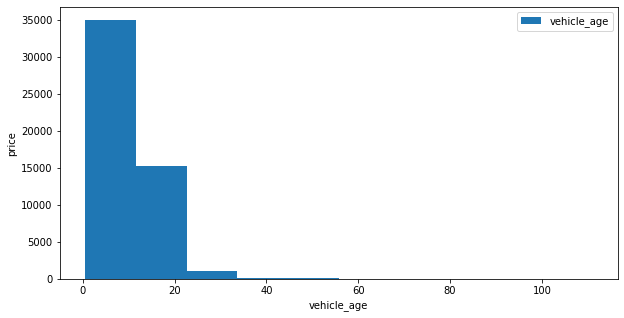

In [54]:
for col in ['vehicle_age']:
    data.plot(x= 'price', y= col, kind= 'hist', figsize= (10,5))
    plt.xlabel(col)
    plt.ylabel('price')


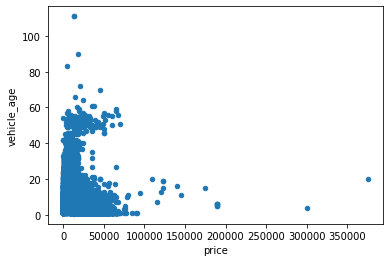

In [55]:
for col in ['vehicle_age']:
    data.plot(x= 'price', y= col, kind= 'scatter')
    plt.xlabel('price')
    plt.ylabel(col)

In [56]:
print(data.query('price <=100'))

       price  model_year                model  condition  cylinders    fuel  \
405        1      2014.0     chevrolet camaro          3        6.0     gas   
3063       1      1998.0  chevrolet silverado          2        8.0     gas   
3808       1      2007.0      chevrolet tahoe          2        8.0     gas   
3902       1      1996.0           ford f-150          1        8.0     gas   
4140       1      2004.0  chevrolet silverado          3        8.0  diesel   
...      ...         ...                  ...        ...        ...     ...   
50245      1      1986.0  chevrolet silverado          2        8.0     gas   
50393      1      2003.0    gmc sierra 2500hd          2        8.0  diesel   
50430      5      2011.0        toyota sienna          2        6.0     gas   
50971     10      2012.0         toyota prius          3        4.0  hybrid   
51256      1      2012.0       honda civic lx          3        4.0     gas   

            odometer transmission       type paint_

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51525 non-null  int64         
 1   model_year          51515 non-null  float64       
 2   model               51525 non-null  object        
 3   condition           51525 non-null  int64         
 4   cylinders           51510 non-null  float64       
 5   fuel                51525 non-null  object        
 6   odometer            51525 non-null  float64       
 7   transmission        51525 non-null  object        
 8   type                51525 non-null  object        
 9   paint_color         51525 non-null  object        
 10  is_4wd              51525 non-null  float64       
 11  date_posted         51525 non-null  datetime64[ns]
 12  days_listed         51525 non-null  int64         
 13  vehicle_age         51515 non-null  float64   

In [58]:
data = data.dropna(subset=['model_year', 'cylinders']).reset_index(drop=True)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51500 entries, 0 to 51499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51500 non-null  int64         
 1   model_year          51500 non-null  float64       
 2   model               51500 non-null  object        
 3   condition           51500 non-null  int64         
 4   cylinders           51500 non-null  float64       
 5   fuel                51500 non-null  object        
 6   odometer            51500 non-null  float64       
 7   transmission        51500 non-null  object        
 8   type                51500 non-null  object        
 9   paint_color         51500 non-null  object        
 10  is_4wd              51500 non-null  float64       
 11  date_posted         51500 non-null  datetime64[ns]
 12  days_listed         51500 non-null  int64         
 13  vehicle_age         51500 non-null  float64   

Comment: based on the histogram above, the younger the vehicle is, the more expensive. 

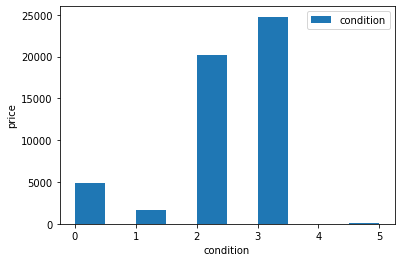

In [60]:
#checking on correlation between 'condition' and 'price'.
for col in ['condition']:
    data.plot(x= 'price', y= col, kind= 'hist')
    plt.xlabel(col)
    plt.ylabel('price')

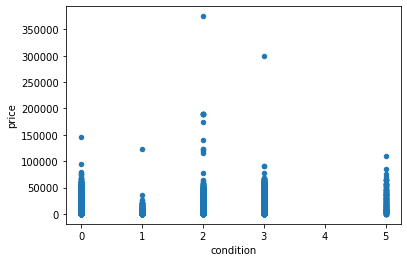

In [61]:
for col in ['condition']:
    data.plot(x= col, y= 'price', kind= 'scatter')
    plt.xlabel(col)
    plt.ylabel('price')

Comment: Based on the histogram above, generally the better the condition of the vehicle, the more expensive the vehicle is.

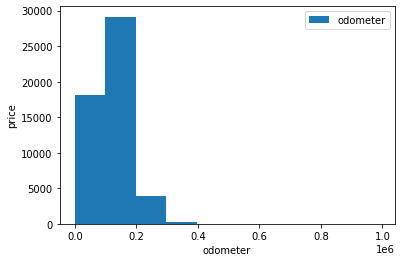

In [62]:
for col in ['odometer']:
    data.plot(x= 'price', y= col, kind= 'hist')
    plt.xlabel(col)
    plt.ylabel('price')

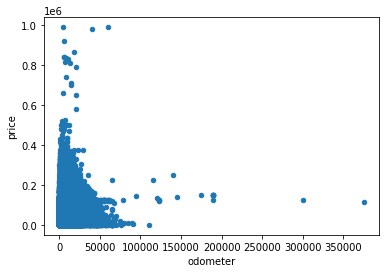

In [63]:
for col in ['odometer']:
    data.plot(x= 'price', y= col, kind= 'scatter')
    plt.xlabel('odometer')
    plt.ylabel('price')

Comment: Based on this scatter plot, it looks like the lower the odometer number, the higher the prices. It does look like we do have an outlier. 

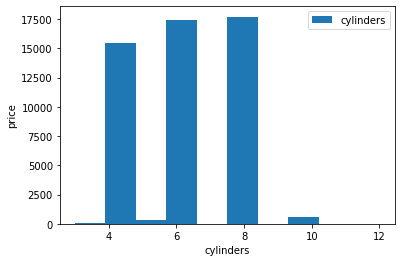

In [64]:
for col in ['cylinders']:
    data.plot(x= 'price', y= col, kind= 'hist')
    plt.xlabel(col)
    plt.ylabel('price')


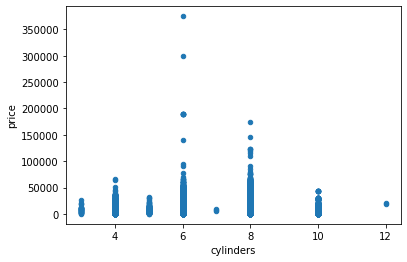

In [65]:
for col in ['price']:
    data.plot(x= 'cylinders', y= col, kind= 'scatter')
    plt.xlabel('cylinders')
    plt.ylabel('price')

Comment: Based on the histogram above, it generally looks like the more cylinders a vehicles has, the more expensive it is. Although we might have outliers in the 10 cylinder group of vehicles.

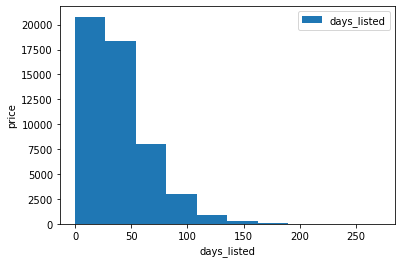

In [66]:
for col in ['days_listed']:
    data.plot(x= 'price', y= col, kind= 'hist')
    plt.xlabel(col)
    plt.ylabel('price')
         

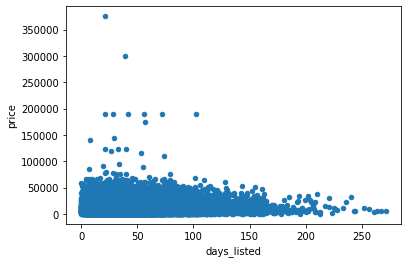

In [67]:
for col in ['days_listed']:
    data.plot(x= col, y= 'price', kind= 'scatter')
    plt.xlabel('days_listed')
    plt.ylabel('price')

Comment: Based on the above histogram, it also seems that the higher priced cars get sold faster than lower priced cars. 

## Study and treat outliers

[Given the results above, determine what columns may contain outliers, and create a DataFrame without those outliers. Hint: Outliers can be identified by defining the lower/upper limits for normal range of values.]

In [68]:
print(data.query('price <=100'))

       price  model_year                model  condition  cylinders    fuel  \
405        1      2014.0     chevrolet camaro          3        6.0     gas   
3062       1      1998.0  chevrolet silverado          2        8.0     gas   
3807       1      2007.0      chevrolet tahoe          2        8.0     gas   
3901       1      1996.0           ford f-150          1        8.0     gas   
4139       1      2004.0  chevrolet silverado          3        8.0  diesel   
...      ...         ...                  ...        ...        ...     ...   
50220      1      1986.0  chevrolet silverado          2        8.0     gas   
50368      1      2003.0    gmc sierra 2500hd          2        8.0  diesel   
50405      5      2011.0        toyota sienna          2        6.0     gas   
50946     10      2012.0         toyota prius          3        4.0  hybrid   
51231      1      2012.0       honda civic lx          3        4.0     gas   

            odometer transmission       type paint_

In [69]:
len(data[data['price']== 1])

798

Comment: Looks like there are 465 vehicles priced at $1. We assume it looks like an error. We'll drop these vehicles so it doesn't skew our data.

In [70]:
data.loc[data['price'] == 1, 'price'] = np.nan #converting values that equal to 1 to NaN values

<AxesSubplot:>

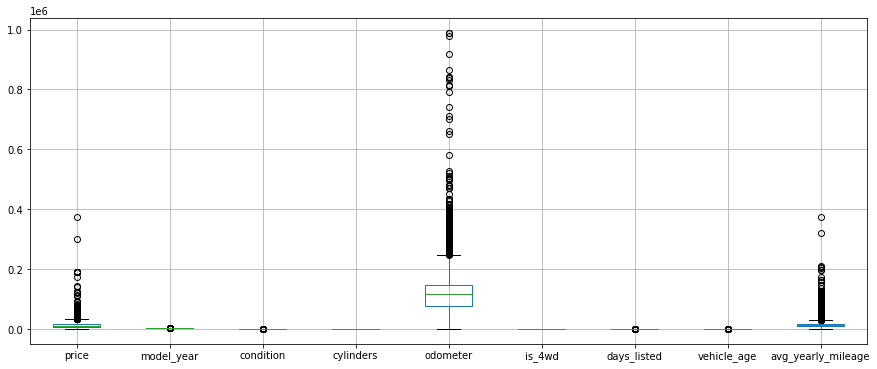

In [71]:
data.boxplot(figsize= (15,6))

In [72]:
# Determine the lower limits for outliers
def outliers(data, feature):
    Q1= data['price'].quantile(0.25)
    Q3 = data['price'].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR # Determine the upper limits for outliers
    lower_limit = Q1 - 1.5 * IQR # Determine the lower limits for outliers
    return upper_limit, lower_limit

upper, lower = outliers(data, "price")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  34364.0
Lower Whisker:  -12140.0


In [73]:
data[(data['price'] > lower) | (data['price'] < upper)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,avg_yearly_mileage
0,9400.0,2011.0,bmw x5,2,6.0,gas,145000.000000,automatic,SUV,missing,1.0,2018-06-23,19,8.0,18125
1,25500.0,2010.0,ford f-150,2,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,9.0,9856
2,5500.0,2013.0,hyundai sonata,0,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,7.0,15714
3,1500.0,2003.0,ford f-150,1,8.0,gas,120877.717388,automatic,pickup,missing,0.0,2019-03-22,9,17.0,7110
4,14900.0,2017.0,chrysler 200,3,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,3.0,26968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9249.0,2013.0,nissan maxima,0,6.0,gas,88136.000000,automatic,sedan,black,0.0,2018-10-03,37,6.0,14689
51496,2700.0,2002.0,honda civic,0,4.0,gas,181500.000000,automatic,sedan,white,0.0,2018-11-14,22,17.0,10676
51497,3950.0,2009.0,hyundai sonata,3,4.0,gas,128000.000000,automatic,sedan,blue,0.0,2018-11-15,32,10.0,12800
51498,7455.0,2013.0,toyota corolla,2,4.0,gas,139573.000000,automatic,sedan,black,0.0,2018-07-02,71,6.0,23262


In [74]:
# Store data without outliers in a separate DataFrame
new_data = data[(data['price'] > lower) & (data['price'] < upper)]

In [75]:
new_data.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,vehicle_age,avg_yearly_mileage
count,49008.000000,49008.000000,49008.000000,49008.000000,49008.000000,49008.000000,49008.000000,49008.000000,49008.000000
mean,11254.549196,2009.519691,2.265038,6.054338,118589.198116,0.478167,39.569764,9.787810,15234.432297
std,7708.845197,5.958444,0.899464,1.637840,58850.040497,0.499528,28.218389,5.971735,11460.645468
min,3.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,5000.000000,2006.000000,2.000000,4.000000,83095.750000,0.000000,19.000000,6.000000,9392.750000
50%,8995.000000,2011.000000,2.000000,6.000000,118312.160118,0.000000,33.000000,9.000000,13134.000000
75%,15956.750000,2014.000000,3.000000,8.000000,149168.500000,1.000000,53.000000,13.000000,17976.000000
max,34275.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,271.000000,111.000000,373200.000000


## Study core parameters without outliers

[Use the filtered data to make new plots. Compare with the earlier ones (that included outliers). Draw conclusions for each.]

In [76]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49008 entries, 0 to 51499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               49008 non-null  float64       
 1   model_year          49008 non-null  float64       
 2   model               49008 non-null  object        
 3   condition           49008 non-null  int64         
 4   cylinders           49008 non-null  float64       
 5   fuel                49008 non-null  object        
 6   odometer            49008 non-null  float64       
 7   transmission        49008 non-null  object        
 8   type                49008 non-null  object        
 9   paint_color         49008 non-null  object        
 10  is_4wd              49008 non-null  float64       
 11  date_posted         49008 non-null  datetime64[ns]
 12  days_listed         49008 non-null  int64         
 13  vehicle_age         49008 non-null  float64   

In [77]:
new_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,avg_yearly_mileage
0,9400.0,2011.0,bmw x5,2,6.0,gas,145000.000000,automatic,SUV,missing,1.0,2018-06-23,19,8.0,18125
1,25500.0,2010.0,ford f-150,2,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,9.0,9856
2,5500.0,2013.0,hyundai sonata,0,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,7.0,15714
3,1500.0,2003.0,ford f-150,1,8.0,gas,120877.717388,automatic,pickup,missing,0.0,2019-03-22,9,17.0,7110
4,14900.0,2017.0,chrysler 200,3,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,3.0,26968


<AxesSubplot:>

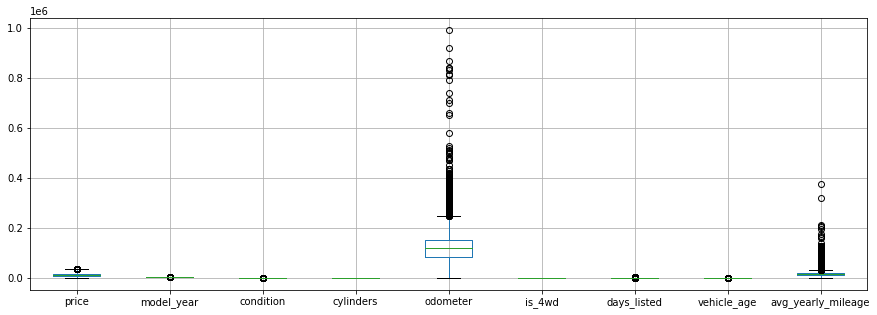

In [78]:
new_data.boxplot(figsize= (15,5))

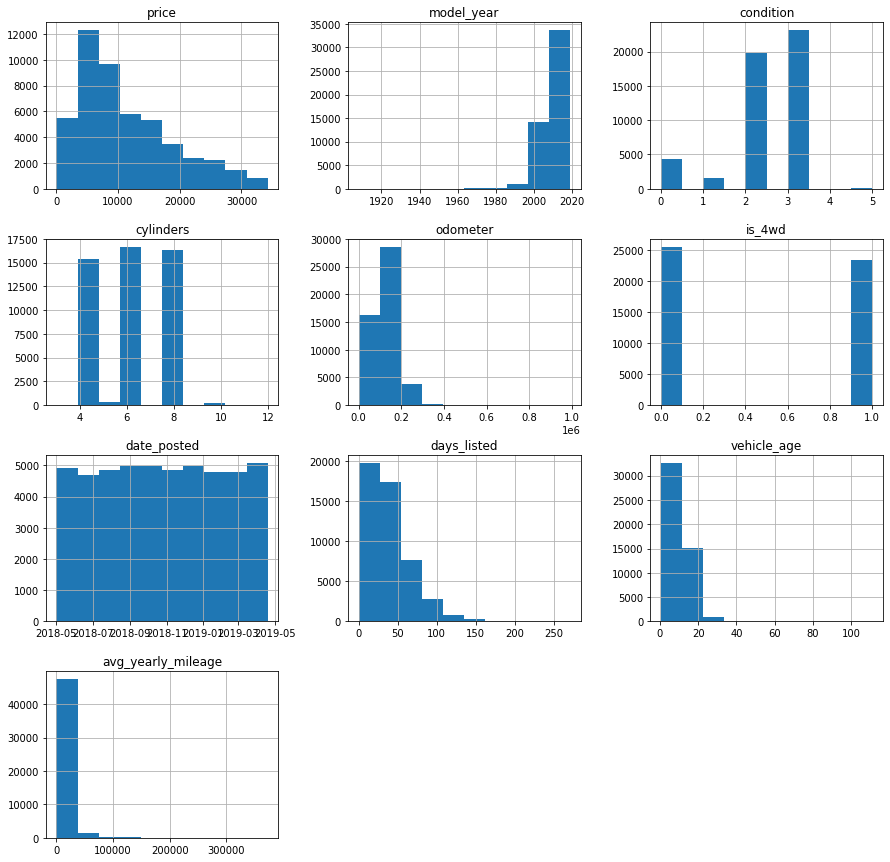

In [79]:
new_data.hist(figsize= (15,15))
plt.show()

In [80]:
new_data['days_listed'].mean()

39.56976412014365

In [81]:
new_data['days_listed'].median()

33.0

In [82]:
new_data['days_listed'].describe()

count    49008.000000
mean        39.569764
std         28.218389
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Comment: Here we can see that the average time a vehicle is listed is for about 39 days. There are times when a posting would be taken down immediately. And the maximum number of days a vehicle has been listed is 271 days. 

## Average price per each type of vehicle

[Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.]

In [83]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49008 entries, 0 to 51499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               49008 non-null  float64       
 1   model_year          49008 non-null  float64       
 2   model               49008 non-null  object        
 3   condition           49008 non-null  int64         
 4   cylinders           49008 non-null  float64       
 5   fuel                49008 non-null  object        
 6   odometer            49008 non-null  float64       
 7   transmission        49008 non-null  object        
 8   type                49008 non-null  object        
 9   paint_color         49008 non-null  object        
 10  is_4wd              49008 non-null  float64       
 11  date_posted         49008 non-null  datetime64[ns]
 12  days_listed         49008 non-null  int64         
 13  vehicle_age         49008 non-null  float64   

In [84]:
new_data.shape

(49008, 15)

Comment: Looks like there are a total of 49,008 ads

In [85]:
new_data['type'].value_counts()

sedan          12002
SUV            11827
truck          11254
pickup          6598
coupe           2149
wagon           1528
mini-van        1154
hatchback       1036
van              573
convertible      409
other            249
offroad          206
bus               23
Name: type, dtype: int64

Text(0, 0.5, 'Number of Vehicles')

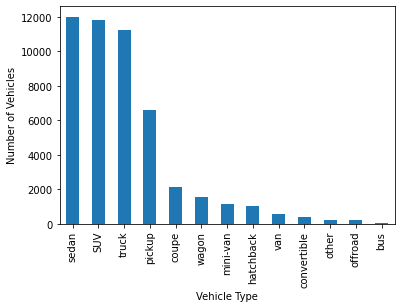

In [86]:
new_data['type'].value_counts().plot(kind= 'bar')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Vehicles')

Comment: Here it looks like the most number of ads are for the sedan and the SUVs

In [87]:
new_data[new_data['type'] == 'sedan']['price'].mean()

7023.652724545909

In [88]:
new_data.pivot_table(index= 'type', columns= None, values= 'price' , aggfunc= 'mean')

,price
type,
SUV,10530.843071
bus,17445.913043
convertible,12754.163814
coupe,13718.494183
hatchback,6887.380309
mini-van,8020.729636
offroad,13177.674757
other,10588.441767
pickup,14581.444983


In [89]:
vehicle_type_mean= new_data.pivot_table(index= 'type', columns= None, values= 'price' , aggfunc= 'mean')

Text(0, 0.5, 'Price')

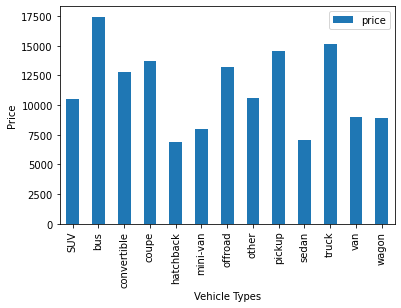

In [90]:
vehicle_type_mean.plot(kind= 'bar')
plt.xlabel('Vehicle Types')
plt.ylabel('Price')

In [91]:
new_data[new_data['type'] == 'SUV']['price'].mean()

10530.843070939376

Comment: As we can see in the bar graph above, sedans seem to be priced lower. SUVs are priced a bit more but that would make sense since SUVs are generally large vehicles.

## Price factors

Text(0, 0.5, 'Price')

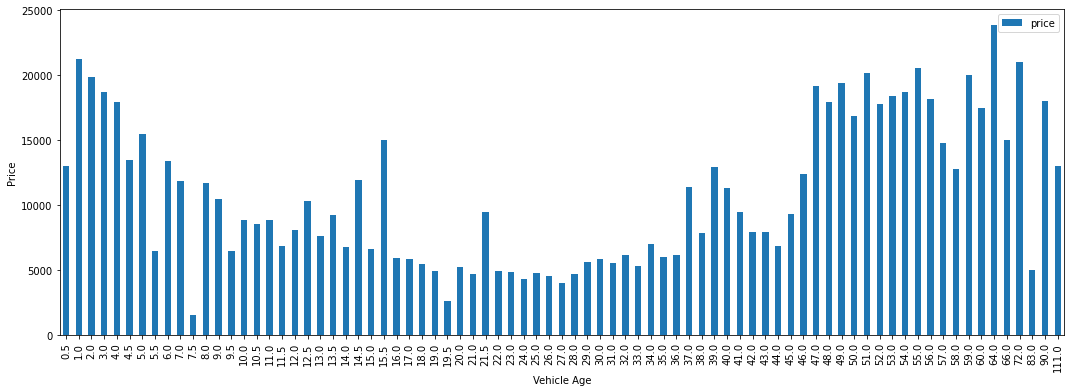

In [92]:
vehicle_age_mean= new_data.pivot_table(index= 'vehicle_age', columns= None, values= 'price' , aggfunc= 'mean')
vehicle_age_mean.plot(kind= 'bar', figsize= (18, 6))
plt.xlabel('Vehicle Age')
plt.ylabel('Price')

Comment: Here we can see that when a vehicle is brand new, they usually start off priced, pretty high. As the vehicle ages, the price depreciates. For some of the vehicles that do get older, they increase in price the older they get. This must be due to some vehicles that might be considered collectible items. 

<AxesSubplot:ylabel='Frequency'>

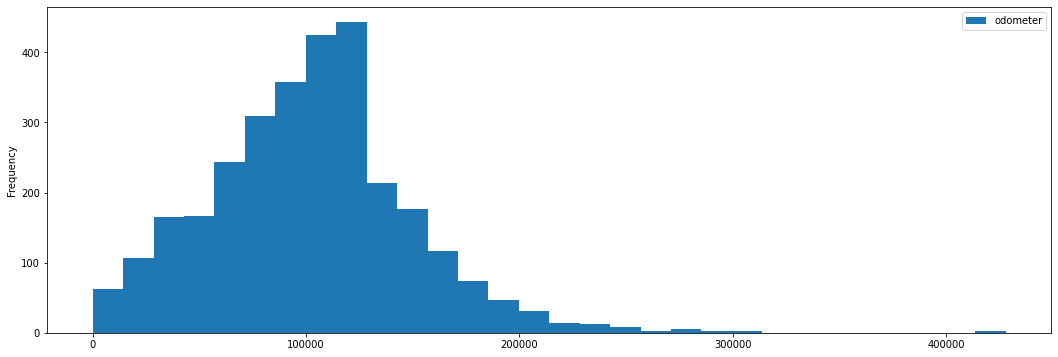

In [93]:
vehicle_mileage_mean= new_data.pivot_table(index= 'price', columns= None, values= 'odometer' , aggfunc= 'mean')
vehicle_mileage_mean.plot(kind= 'hist', bins= 30, figsize= (18, 6))
#plt.xlabel('Vehicle Mileage')
#plt.ylabel('Price')

In [94]:
new_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,avg_yearly_mileage
0,9400.0,2011.0,bmw x5,2,6.0,gas,145000.000000,automatic,SUV,missing,1.0,2018-06-23,19,8.0,18125
1,25500.0,2010.0,ford f-150,2,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,9.0,9856
2,5500.0,2013.0,hyundai sonata,0,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,7.0,15714
3,1500.0,2003.0,ford f-150,1,8.0,gas,120877.717388,automatic,pickup,missing,0.0,2019-03-22,9,17.0,7110
4,14900.0,2017.0,chrysler 200,3,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,3.0,26968


In [95]:
#new_data.pivot_table(index= 'price', columns= 'odometer')

In [96]:
#from scipy import stats
#zscore_values = stats.zscore(new_data['price'])

In [97]:
#filtered_data = df[abs(zscore_values)<3].all(axis= 1)
#new_data.shape

In [98]:
#filtered = new_data[(abs(stats.zscore(new_data[['price']]))<3).all(axis=1)]
#filtered = filtered.reset_index(drop=True, inplace=False)

In [99]:
#filtered.shape

array([[<AxesSubplot:title={'center':'vehicle_age'}>,
        <AxesSubplot:title={'center':'odometer'}>],
       [<AxesSubplot:title={'center':'days_listed'}>, <AxesSubplot:>]],
      dtype=object)

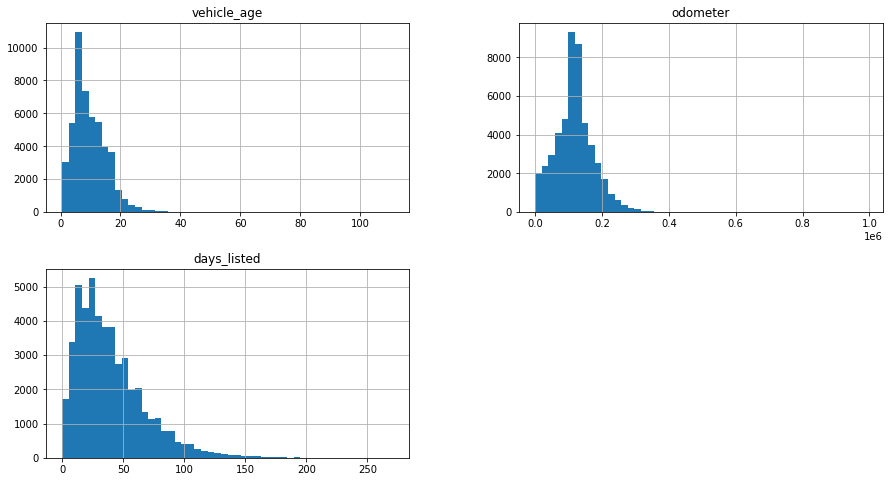

In [100]:
new_data[['vehicle_age', 'odometer', 'days_listed']].hist(bins=50, figsize=(15,8))

Text(0, 0.5, 'Price')

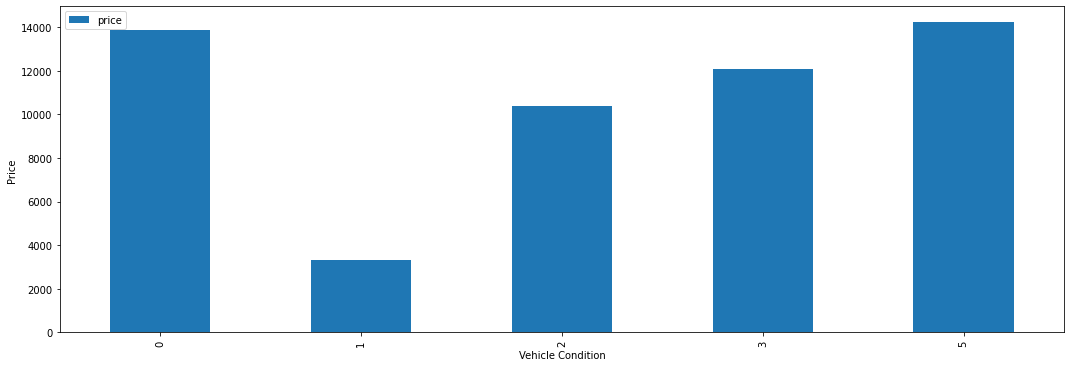

In [101]:
vehicle_condition_mean= new_data.pivot_table(index= 'condition', columns= None, values= 'price' , aggfunc= 'mean')
vehicle_condition_mean.plot(kind= 'bar', figsize= (18, 6))
plt.xlabel('Vehicle Condition')
plt.ylabel('Price')

Text(0.5, 1.0, 'Correlation between Condition and Price')

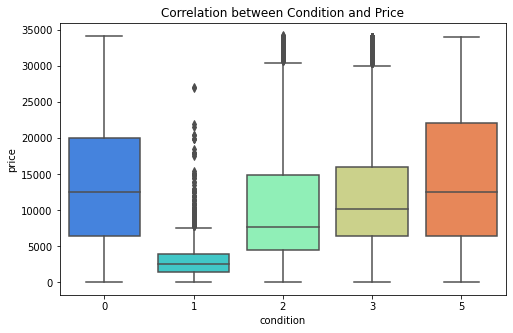

In [102]:
plt.figure(figsize=(8,5))
sns.boxplot(x='condition',y='price',data= new_data, palette='rainbow')
plt.title("Correlation between Condition and Price")

In [103]:
#condition_price = new_data.pivot_table(index='condition', values='price')
#new_data['price'].sort_values(ascending= False).plot(kind= 'bar')

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='odometer',y='price',data= new_data, palette='rainbow')
plt.title("Correlation between Mileage and Price")

Text(0.5, 1.0, 'Correlation between Mileage and Price')

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='odometer',y='price',data= new_data, palette='rainbow')
plt.title("Correlation between Odometer and Price")

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(new_data.odometer, new_data.price)

In [ ]:
#mileage_price = new_data.pivot_table(index='odometer', values='price')
#new_data['price'].sort_values(ascending= False).plot(kind= 'bar')

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='transmission',y='price',data= new_data, palette='rainbow')
plt.title("Correlation between Transmission and Price")

In [ ]:
#transmission_price = new_data.pivot_table(index='transmission', values='price')
#new_data['price'].sort_values(ascending= False).plot(kind= 'bar')

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='paint_color',y='price',data= new_data)
plt.title("Correlation between Color and Price")

In [ ]:
#color_price = new_data.pivot_table(index='color', values='price')
#new_data['price'].sort_values(ascending= False).plot(kind= 'bar')

## General conclusion

[List your important conclusions in this final section, make sure they include those that led you to the way you processed and analyzed the data. Cover the missing values, duplicates, outliers and possible reasons and solutions for problematic artifacts that you had to address. Don't forget to remove all bracketed comments before submitting your project.]

Exploring the data:

- In going through the initial data, we discovered that a lot of the numeric values in the columns had many decimal points, and it was difficult to read. 
- There were a lot of NaN or Null Values across 5 different columns, the most being in the ‘is_4wd’ column which took up about 50% of the data. 

Treating Missing Values:

- In the ‘is_4wd’ column we converted the False values to a numerical 0 so the data can be easily handled.
- In the ‘paint_color’ column we filled in missing values with ‘missing’.
- We filled in the median value to replace missing values in the columns  ‘odometer’, ‘model_year’, and ‘cylinders’.

Fix Data Types:

- Next, we converted the data types of columns where there were too many decimals. These columns are ‘model_year’, ‘cylinders’, ‘odometer’, and ‘is_4wd’.

Enrich Data:

- Here we added the vehicle’s age when the post was added to the site.
- Added 1 to the age to account for additional months that weren’t counted. 
- Added a column called ‘avg_yearly_mileage’ to show how much each car was used on average.
- We changed the values in the ‘condition’ column from string to numeric to show it as a rating, and to be easily handled.

Study Core Parameters:
- Histogram of vehicle age and price
- Histogram of vehicle condition and price
- Scatter plot of vehicle odometer and price
- Histogram of vehicle cylinders/ transmission and price
- Histogram of days_listed and price
- Here we see outliers

Treat outliers:
- Here we got rid of the outliers by creating upper and lower limits and saving that data frame to the variable ‘new_data’.

Based on our graphs above we've learned that:
- Prices depend on the type of vehicle. Cars like sedans and SUVs will be more moderately priced, while cars like trucks and buses will be more expensive.
- Prices depend on vehicle age. On average, the older a car is the cheaper it will be, unless they are classic collectibles. 
- In general the higher the mileage the cheaper the price is, unless its a collectible vehicle. 
- In regards to the condition of a vehicles, the only times a vehicle is at its highest price is when it’s brand new or when it’s very old(collectibles). Vehicles in poor condition has the lowest prices.
- Vehicles that have Manual Transmission generally are cheaper than automatic vehicles. 
- Vehicles with the colors Orange and Yellow seem to be more expensive than moderately priced vehicles that are grey and silver. The cheapest vehicles are green and purple in color. Most likely the least desirable of the colors. 